In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

# Specify the file path
file_path = '/content/drive/My Drive/Data/FullDataRegData.csv'

# Read the CSV file
data = pd.read_csv(file_path)

In [5]:
data

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,SecondB,...,GDP,HBP,SH,SF,IBB,LOB,WalkHitPitch,FirstB,Out,Postseason
0,Arizona Diamondbacks,57,26.5,4.33,162,6027,5351,702,1232,262,...,97,60,31,50,14,1039,591,773,4119,0
1,Baltimore Orioles,58,27.0,4.16,162,6049,5429,674,1281,275,...,95,83,12,43,10,1095,559,810,4148,0
2,Boston Red Sox,54,28.8,4.54,162,6144,5539,735,1427,352,...,131,63,12,50,23,1133,541,908,4112,0
3,Chicago Cubs,64,27.9,4.06,162,6072,5425,657,1293,265,...,130,84,19,36,16,1100,591,838,4132,0
4,Chicago White Sox,44,29.3,4.23,162,6123,5611,686,1435,272,...,127,73,16,35,9,1117,461,1005,4176,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Washington Nationals,43,28.8,4.71,162,6201,5490,763,1403,268,...,102,64,48,63,49,1105,600,903,4087,1
176,New York Mets,46,29.5,4.14,162,6115,5459,671,1342,240,...,123,62,35,41,43,1120,579,865,4117,1
177,Texas Rangers,52,28.4,4.72,162,6089,5525,765,1446,257,...,114,70,18,40,23,1038,506,951,4079,1
178,Toronto Blue Jays,49,30.0,4.69,162,6233,5479,759,1358,276,...,153,55,26,40,16,1120,687,843,4121,1


In [6]:
# Specify the columns you want to keep
columns_to_keep = ["BatAge", "R", "SecondB", "ThirdB", "HR", "RBI", "SB", "CS", "BB", "SO", "OPS+", "TB", "GDP", "HBP", "SH", "SF", "IBB","LOB", "FirstB", "Out", "Postseason"]

# Filter the data for the specified columns
filtered_data = data.loc[:, columns_to_keep]

# Now, 'filtered_data' contains only the specified columns


In [7]:
filtered_data

,BatAge,R,SecondB,ThirdB,HR,RBI,SB,CS,BB,SO,...,TB,GDP,HBP,SH,SF,IBB,LOB,FirstB,Out,Postseason
0,26.5,702,262,24,173,658,104,29,531,1341,...,2061,97,60,31,50,14,1039,773,4119,0
1,27.0,674,275,25,171,639,95,31,476,1390,...,2119,95,83,12,43,10,1095,810,4148,0
2,28.8,735,352,12,155,704,52,20,478,1373,...,2268,131,63,12,50,23,1133,908,4112,0
3,27.9,657,265,31,159,620,111,37,507,1448,...,2097,130,84,19,36,16,1100,838,4132,0
4,29.3,686,272,9,149,654,58,10,388,1269,...,2172,127,73,16,35,9,1117,1005,4176,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,28.8,763,268,29,203,735,121,39,536,1252,...,2338,102,64,48,63,49,1105,903,4087,1
176,29.5,671,240,19,218,649,42,18,517,1302,...,2274,123,62,35,41,43,1120,865,4117,1
177,28.4,765,257,23,215,746,99,36,436,1220,...,2394,114,70,18,40,23,1038,951,4079,1
178,30.0,759,276,18,221,728,54,24,632,1362,...,2333,153,55,26,40,16,1120,843,4121,1


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


In [9]:
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)


In [10]:
# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, data['Postseason'], test_size=0.2, random_state=42)


In [11]:
# Step 3: Create and train a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
# Step 4: Evaluate Decision Tree model
dt_accuracy = dt_model.score(X_test, y_test)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 1.0


In [13]:
# Step 5: Create and train an XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Step 6: Evaluate XGBoost model
xgb_accuracy = xgb_model.score(X_test, y_test)
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 1.0


In [28]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.utils import shuffle

# Shuffle the data
shuffled_data = shuffle(filtered_data, random_state=42)


In [41]:

# Split features and target
X = shuffled_data.drop('Postseason', axis=1)
y = shuffled_data['Postseason']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create models
dt_model = DecisionTreeClassifier()
xgb_model = XGBClassifier()


In [45]:
# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='accuracy')
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring='accuracy')


In [31]:
# Print cross-validation scores
print("Decision Tree Cross-Validation Scores:", dt_cv_scores)
print("XGBoost Cross-Validation Scores:", xgb_cv_scores)

# Print mean cross-validation scores
print("Mean Decision Tree CV Score:", dt_cv_scores.mean())
print("Mean XGBoost CV Score:", xgb_cv_scores.mean())

Decision Tree Cross-Validation Scores: [0.68965517 0.5862069  0.72413793 0.68965517 0.64285714]
XGBoost Cross-Validation Scores: [0.75862069 0.68965517 0.79310345 0.79310345 0.57142857]
Mean Decision Tree CV Score: 0.6665024630541871
Mean XGBoost CV Score: 0.7211822660098521


In [32]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Generate cross-validated predictions for Decision Tree model
dt_cv_predictions = cross_val_predict(dt_model, X_train, y_train, cv=cv)

# Generate cross-validated predictions for XGBoost model
xgb_cv_predictions = cross_val_predict(xgb_model, X_train, y_train, cv=cv)


In [33]:
# Print classification report for Decision Tree model
print("Classification Report for Decision Tree:")
print(classification_report(y_train, dt_cv_predictions))

# Print classification report for XGBoost model
print("Classification Report for XGBoost:")
print(classification_report(y_train, xgb_cv_predictions))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        96
           1       0.52      0.54      0.53        48

    accuracy                           0.68       144
   macro avg       0.64      0.65      0.64       144
weighted avg       0.68      0.68      0.68       144

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80        96
           1       0.60      0.52      0.56        48

    accuracy                           0.72       144
   macro avg       0.68      0.67      0.68       144
weighted avg       0.71      0.72      0.72       144



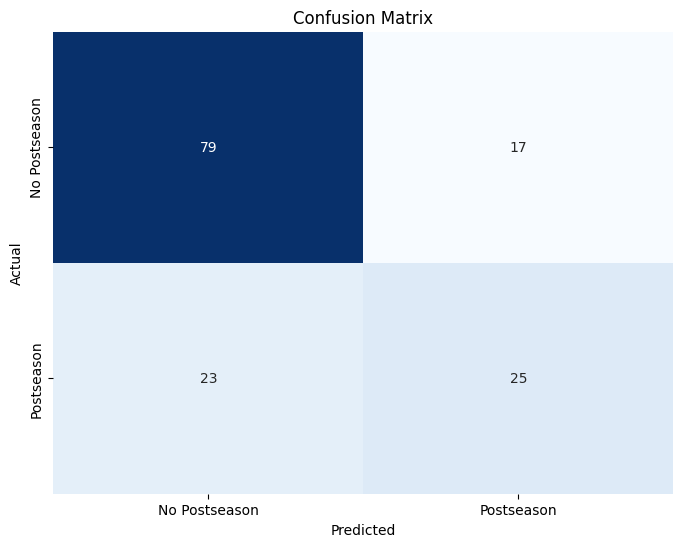

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Postseason', 'Postseason'], yticklabels=['No Postseason', 'Postseason'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [47]:
conf_matrix

array([[79, 17],
       [23, 25]])

In [35]:
!pip install graphviz


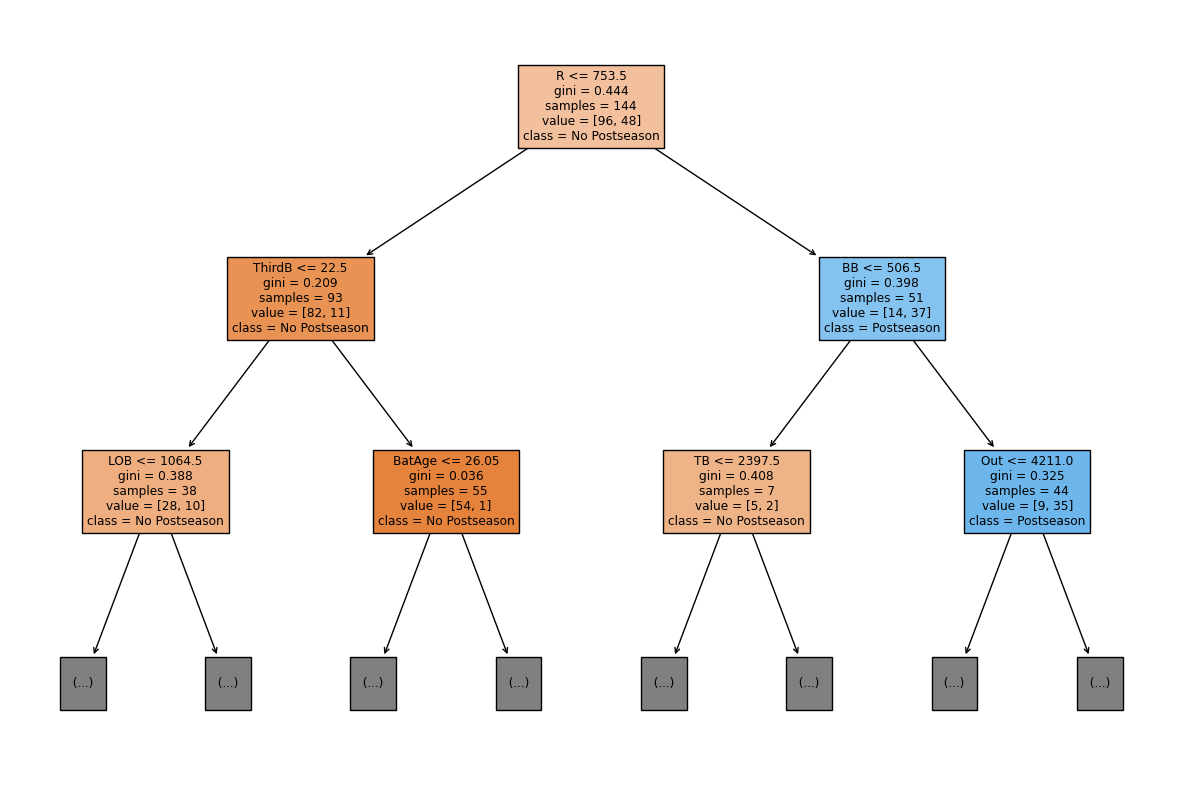

In [50]:
from sklearn import tree
import matplotlib.pyplot as plt

# Train the decision tree model on the entire training data
dt_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['No Postseason', 'Postseason'], filled=True, max_depth=2)
plt.show()



In [46]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='gain', max_num_features=10)  # Adjust max_num_features as needed
plt.title('XGBoost Feature Importance')
plt.show()


NotFittedError: need to call fit or load_model beforehand

<Figure size 1000x800 with 0 Axes>

In [44]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [3, 4, 5],            # Maximum depth of the tree
    'learning_rate': [0.01, 0.1, 0.2], # Learning rate
}

# Create XGBoost classifier
xgb_classifier = XGBClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Predictions using the best estimator
y_pred = random_search.best_estimator_.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01}
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.67      0.57      0.62        14

    accuracy                           0.72        36
   macro avg       0.71      0.69      0.70        36
weighted avg       0.72      0.72      0.72        36



<Figure size 1000x800 with 0 Axes>

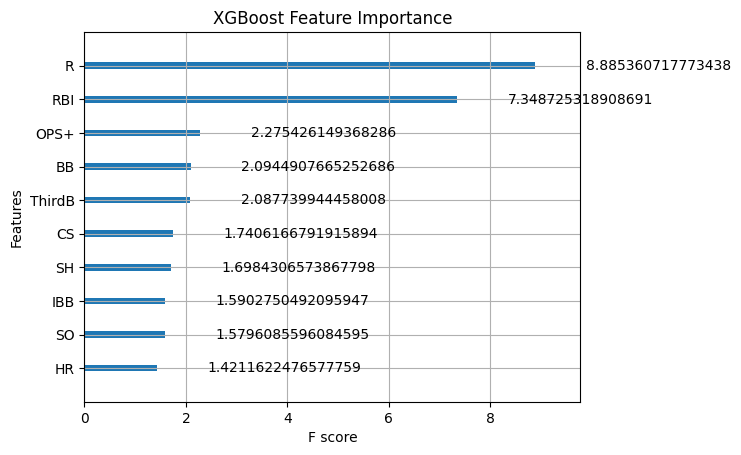

In [49]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(random_search.best_estimator_, importance_type='gain', max_num_features=10)  # Adjust max_num_features as needed
plt.title('XGBoost Feature Importance')
plt.show()
